### Problem -- Consider only the below columns and prepare a prediction model for predicting Price.


In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [4]:
toyota = pd.read_csv('ToyotaCorolla.csv')
toyota

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,�TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


In [5]:
toyota.shape

(1436, 38)

In [6]:
del toyota['Id']
del toyota['Model']

In [7]:
toyota

,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Color,Automatic,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,13500,23,10,2002,46986,Diesel,90,1,Blue,0,...,1,1,1,0,0,0,1,0,0,0
1,13750,23,10,2002,72937,Diesel,90,1,Silver,0,...,1,0,1,0,0,0,1,0,0,0
2,13950,24,9,2002,41711,Diesel,90,1,Blue,0,...,0,0,1,0,0,0,1,0,0,0
3,14950,26,7,2002,48000,Diesel,90,0,Black,0,...,0,0,1,0,0,0,1,0,0,0
4,13750,30,3,2002,38500,Diesel,90,0,Black,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,12,1998,20544,Petrol,86,1,Blue,0,...,1,1,1,0,1,1,1,0,0,0
1432,10845,72,9,1998,19000,Petrol,86,0,Grey,0,...,0,0,1,0,0,1,1,0,0,0
1433,8500,71,10,1998,17016,Petrol,86,0,Blue,0,...,0,0,1,0,0,0,1,0,0,0
1434,7250,70,11,1998,16916,Petrol,86,1,Grey,0,...,0,0,0,0,0,0,1,0,0,0


In [8]:
toyota_data = toyota[['Price',"Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]

In [9]:
toyota_data

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [10]:
toyota_data.nunique()

Price             236
Age_08_04          77
KM               1263
HP                 12
cc                 13
Doors               4
Gears               4
Quarterly_Tax      13
Weight             59
dtype: int64

In [11]:
toyota.dtypes

Price                int64
Age_08_04            int64
Mfg_Month            int64
Mfg_Year             int64
KM                   int64
Fuel_Type           object
HP                   int64
Met_Color            int64
Color               object
Automatic            int64
cc                   int64
Doors                int64
Cylinders            int64
Gears                int64
Quarterly_Tax        int64
Weight               int64
Mfr_Guarantee        int64
BOVAG_Guarantee      int64
Guarantee_Period     int64
ABS                  int64
Airbag_1             int64
Airbag_2             int64
Airco                int64
Automatic_airco      int64
Boardcomputer        int64
CD_Player            int64
Central_Lock         int64
Powered_Windows      int64
Power_Steering       int64
Radio                int64
Mistlamps            int64
Sport_Model          int64
Backseat_Divider     int64
Metallic_Rim         int64
Radio_cassette       int64
Tow_Bar              int64
dtype: object

In [12]:
toyota_data.isna().sum()

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

In [13]:
toyota_data.describe(include='all')

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


In [14]:
toyota_data.corr()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
Quarterly_Tax,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


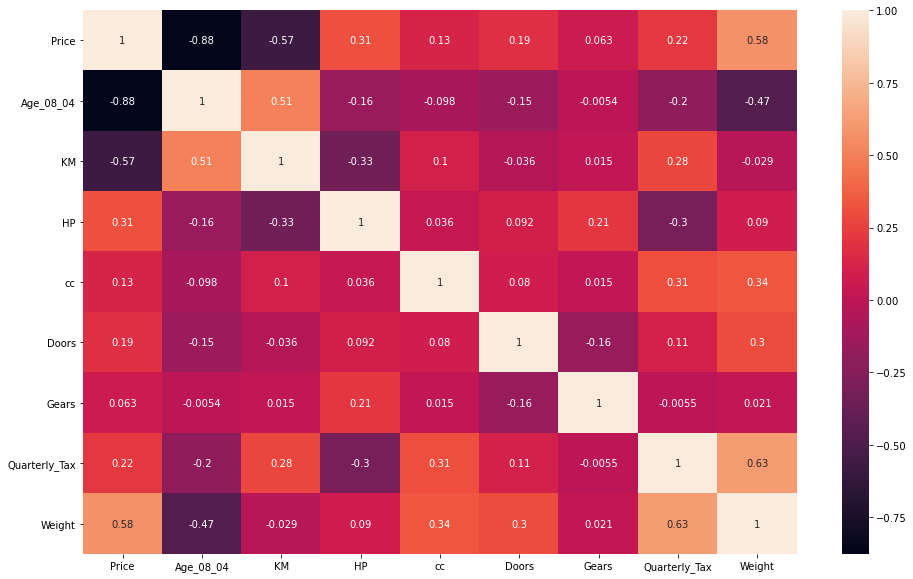

In [17]:
plt.figure(figsize=(16,10))
sns.heatmap(data=toyota_data.corr(),annot=True)
plt.show()

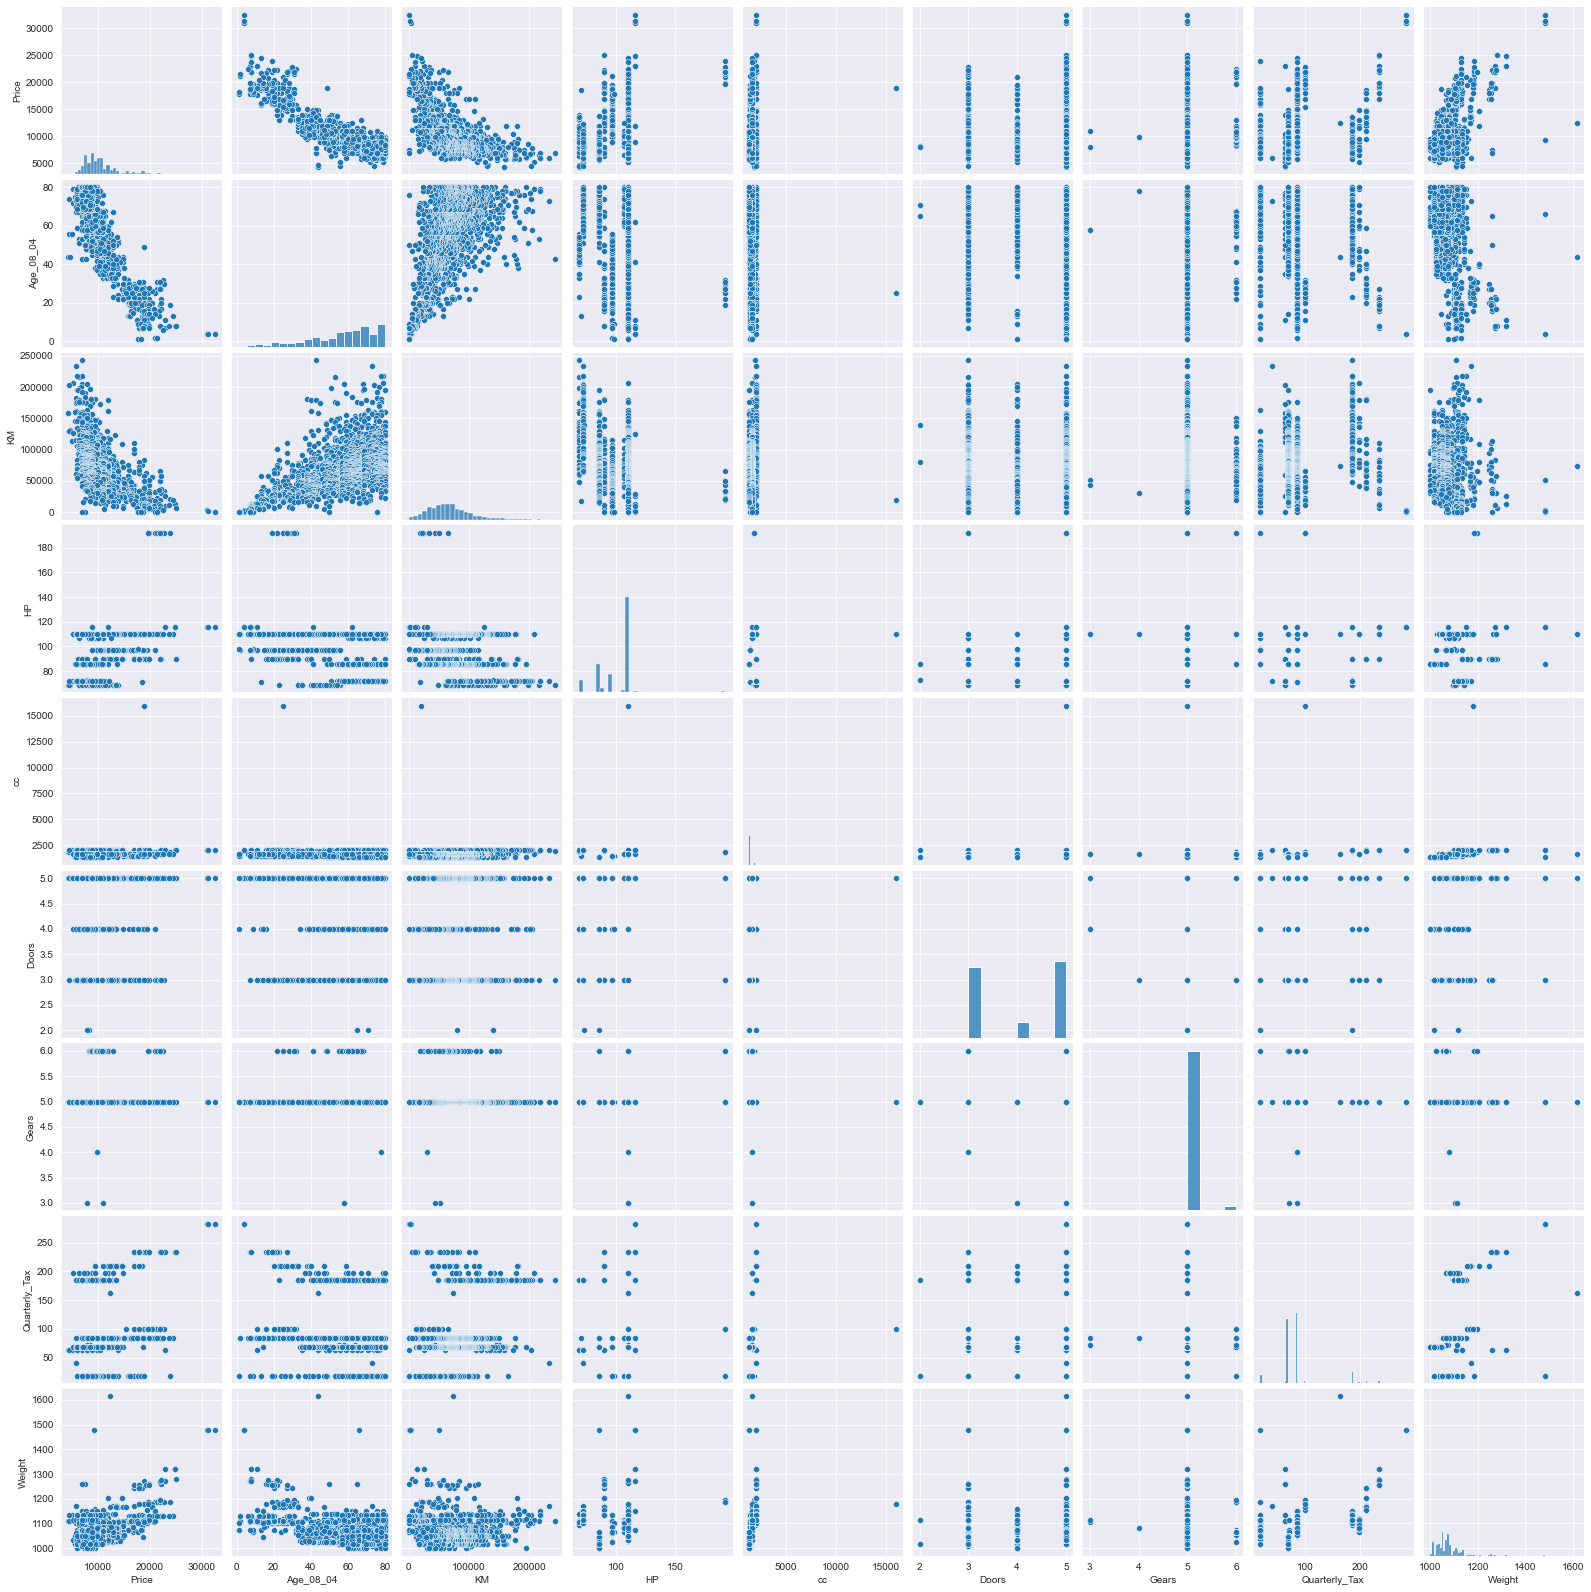

In [18]:
sns.set_style(style='darkgrid')
sns.pairplot(toyota_data)

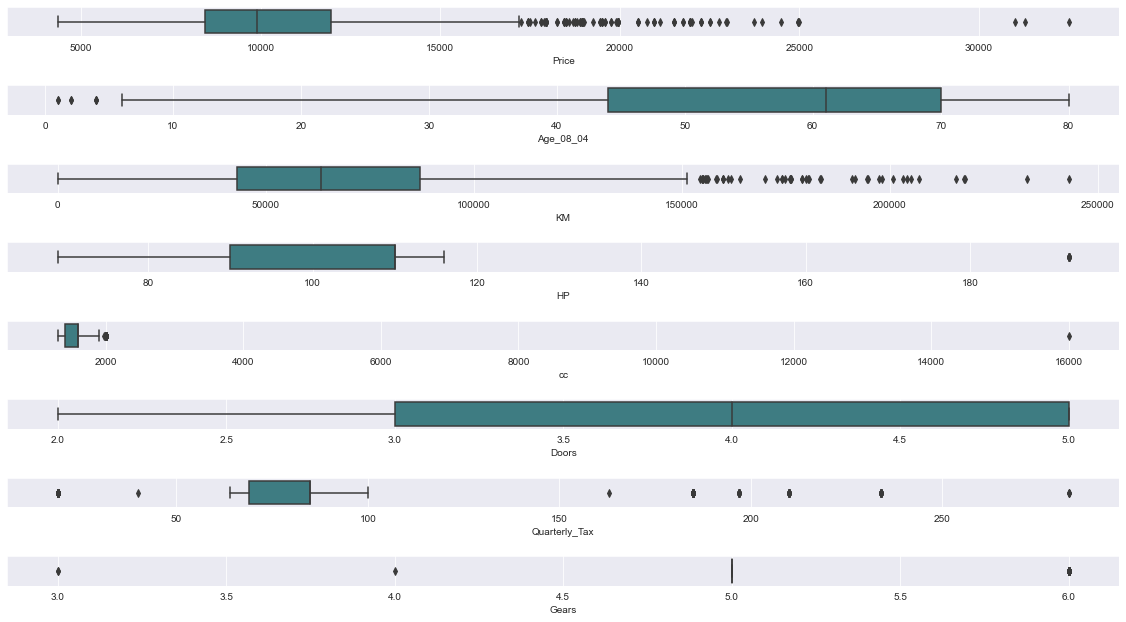

In [19]:
fig, axes=plt.subplots(8,1,figsize=(16,9),sharex=False,sharey=False)
sns.boxplot(x='Price',data=toyota_data,palette='crest',ax=axes[0])
sns.boxplot(x='Age_08_04',data=toyota_data,palette='crest',ax=axes[1])
sns.boxplot(x='KM',data=toyota_data,palette='crest',ax=axes[2])
sns.boxplot(x='HP',data=toyota_data,palette='crest',ax=axes[3])
sns.boxplot(x='cc',data=toyota_data,palette='crest',ax=axes[4])
sns.boxplot(x='Doors',data=toyota_data,palette='crest',ax=axes[5])
sns.boxplot(x='Quarterly_Tax',data=toyota_data,palette='crest',ax=axes[6])
sns.boxplot(x='Gears',data=toyota_data,palette='crest',ax=axes[7])
plt.tight_layout(pad=2.0)

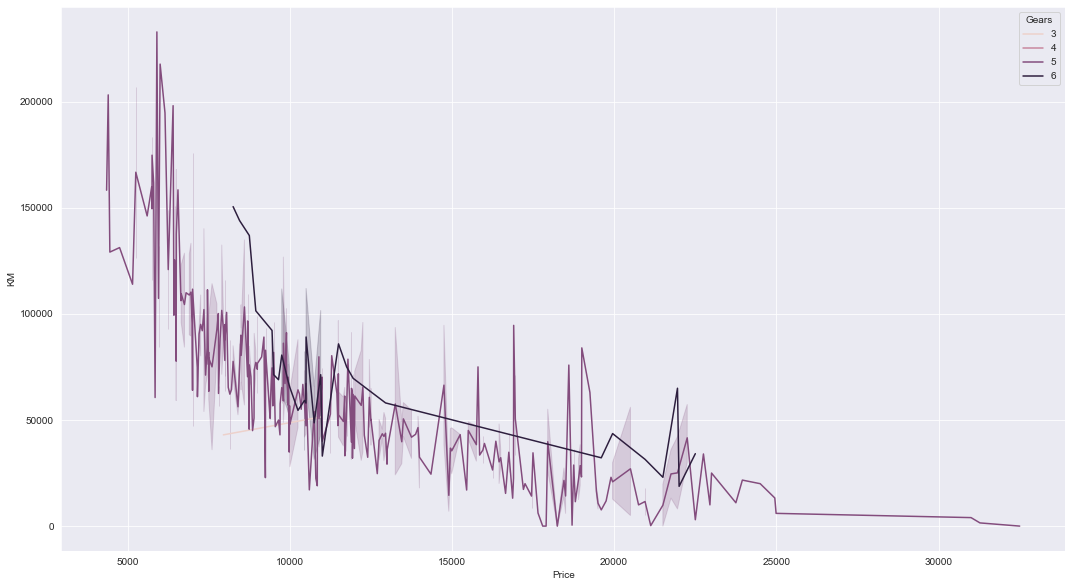

In [20]:
plt.figure(figsize=(18,10))
sns.lineplot(x='Price',y='KM',hue='Gears',data=toyota_data)
plt.show()

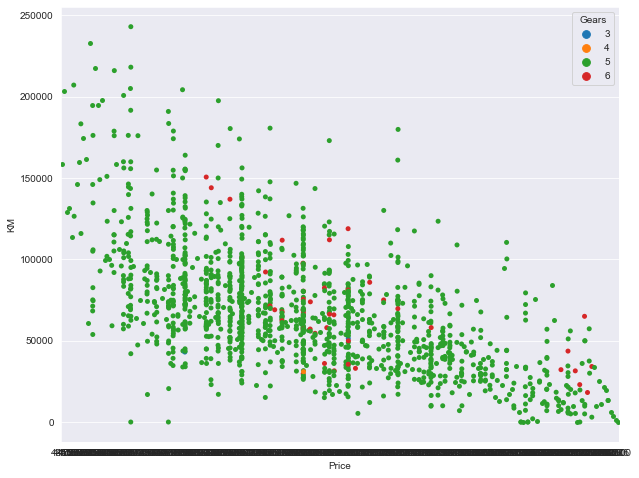

In [23]:
plt.figure(figsize=(10,8))
sns.stripplot(x='Price',y='KM',hue='Gears',data=toyota_data)
plt.show()

#### Preparing the model

In [24]:
import statsmodels.formula.api as smf 
model = smf.ols('Price ~ Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=toyota_data).fit()

In [25]:
(model.rsquared,model.rsquared_adj)

(0.8637627463428191, 0.8629989775766962)

In [26]:
toyota_data

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [27]:
x=toyota_data.drop(labels='Price',axis=1)
y= toyota_data[['Price']]

In [28]:
y_Predt = model.predict(x)
y_Predt

0       16812.580505
1       16272.355186
2       16800.732460
3       16426.496731
4       16222.419010
            ...     
1431     8793.758297
1432     8291.338421
1433     8454.298007
1434     8578.038121
1435    10402.438333
Length: 1436, dtype: float64

In [29]:
model.params

Intercept       -5573.106358
Age_08_04        -121.658402
KM                 -0.020817
HP                 31.680906
cc                 -0.121100
Doors              -1.616641
Gears             594.319936
Quarterly_Tax       3.949081
Weight             16.958632
dtype: float64

In [30]:
print(model.tvalues, '\n', model.pvalues)

Intercept        -3.948666
Age_08_04       -46.511852
KM              -16.621622
HP               11.241018
cc               -1.344222
Doors            -0.040410
Gears             3.016007
Quarterly_Tax     3.014535
Weight           15.879803
dtype: float64 
 Intercept         8.241949e-05
Age_08_04        3.354724e-288
KM                7.538439e-57
HP                3.757218e-28
cc                1.790902e-01
Doors             9.677716e-01
Gears             2.606549e-03
Quarterly_Tax     2.619148e-03
Weight            2.048576e-52
dtype: float64


In [31]:
print('R2 Score           : ',round(model.rsquared,5))      ## Contribution of input features towards the predication
print('R2 adjusted Score  : ',round(model.rsquared_adj,5))  ## Contribution of overall input features towards the predication
print('AIC                : ',round(model.aic,4))
print('BIC                : ',round(model.bic,4))

R2 Score           :  0.86376
R2 adjusted Score  :  0.863
AIC                :  24769.0766
BIC                :  24816.5032


In [32]:
model1= smf.ols(formula= 'Price ~ Age_08_04',data= toyota_data).fit()
print('R2 Score           : ',round(model1.rsquared,5))      ## Contribution of input features towards the predication
print('R2 adjusted Score  : ',round(model1.rsquared_adj,5))  ## Contribution of overall input features towards the predication
print('AIC                : ',round(model1.aic,4))
print('BIC                : ',round(model1.bic,4))

R2 Score           :  0.76841
R2 adjusted Score  :  0.76825
AIC                :  25516.9706
BIC                :  25527.5098


In [33]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     4758.
Date:                Thu, 29 Sep 2022   Prob (F-statistic):               0.00
Time:                        00:55:20   Log-Likelihood:                -12756.
No. Observations:                1436   AIC:                         2.552e+04
Df Residuals:                    1434   BIC:                         2.553e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.029e+04    146.097    138.908      0.000       2e+04    2.06e+04
Age_08_04   -170.9336      2.478    -68.978      0.000    -175.795    -166.073
==============================================================================
Omnibus:                      359.275   Durbin-Watson:                   1.214
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2774.226
Skew:                           0.946   Prob(JB):                         0.00
Kurtosis:                       9.541   Cond. No.                         187.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

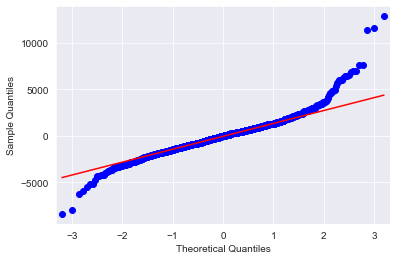

In [34]:
import statsmodels.api as sm
qq_plot = sm.qqplot(model1.resid,line='q')

In [35]:
model2= smf.ols(formula= 'Price ~ Age_08_04+KM',data= toyota_data).fit()
print('R2 Score           : ',round(model2.rsquared,5))      ## Contribution of input features towards the predication
print('R2 adjusted Score  : ',round(model2.rsquared_adj,5))  ## Contribution of overall input features towards the predication
print('AIC                : ',round(model2.aic,4))
print('BIC                : ',round(model2.bic,4))

R2 Score           :  0.78998
R2 adjusted Score  :  0.78968
AIC                :  25378.6096
BIC                :  25394.4185


In [36]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     2695.
Date:                Thu, 29 Sep 2022   Prob (F-statistic):               0.00
Time:                        00:57:29   Log-Likelihood:                -12686.
No. Observations:                1436   AIC:                         2.538e+04
Df Residuals:                    1433   BIC:                         2.539e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.048e+04    140.047    146.259      0.000    2.02e+04    2.08e+04
Age_08_04   -154.1492      2.736    -56.334      0.000    -159.517    -148.782
KM            -0.0165      0.001    -12.130      0.000      -0.019      -0.014
==============================================================================
Omnibus:                      448.686   Durbin-Watson:                   1.291
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3322.042
Skew:                           1.250   Prob(JB):                         0.00
Kurtosis:                      10.019   Cond. No.                     2.49e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.49e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

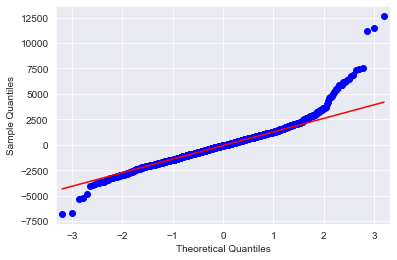

In [37]:
qq_plot = sm.qqplot(model2.resid,line='q')

In [38]:
model3= smf.ols(formula= 'Price ~ Age_08_04+KM+HP',data= toyota_data).fit()
print('R2 Score           : ',round(model3.rsquared,5))      ## Contribution of input features towards the predication
print('R2 adjusted Score  : ',round(model3.rsquared_adj,5))  ## Contribution of overall input features towards the predication
print('AIC                : ',round(model3.aic,4))
print('BIC                : ',round(model3.bic,4))

R2 Score           :  0.81031
R2 adjusted Score  :  0.80991
AIC                :  25234.4118
BIC                :  25255.4902


In [39]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     2039.
Date:                Thu, 29 Sep 2022   Prob (F-statistic):               0.00
Time:                        00:57:56   Log-Likelihood:                -12613.
No. Observations:                1436   AIC:                         2.523e+04
Df Residuals:                    1432   BIC:                         2.526e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.645e+04    351.717     46.771      0.000    1.58e+04    1.71e+04
Age_08_04   -154.6263      2.602    -59.432      0.000    -159.730    -149.523
KM            -0.0115      0.001     -8.480      0.000      -0.014      -0.009
HP            36.6205      2.956     12.388      0.000      30.822      42.419
==============================================================================
Omnibus:                      417.364   Durbin-Watson:                   1.350
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3000.238
Skew:                           1.157   Prob(JB):                         0.00
Kurtosis:                       9.693   Cond. No.                     6.58e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.58e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

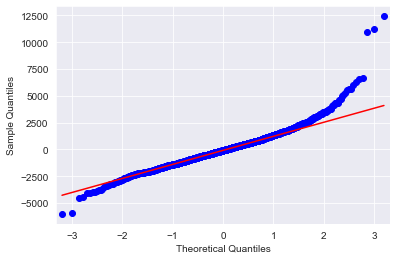

In [40]:
qq_plot = sm.qqplot(model3.resid,line='q')

In [41]:
model4= smf.ols(formula= 'Price ~ Age_08_04+KM+HP+cc',data= toyota_data).fit()
print('R2 Score           : ',round(model4.rsquared,5))      ## Contribution of input features towards the predication
print('R2 adjusted Score  : ',round(model4.rsquared_adj,5))  ## Contribution of overall input features towards the predication
print('AIC                : ',round(model4.aic,4))
print('BIC                : ',round(model4.bic,4))

R2 Score           :  0.81352
R2 adjusted Score  :  0.813
AIC                :  25211.8665
BIC                :  25238.2146


In [42]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     1561.
Date:                Thu, 29 Sep 2022   Prob (F-statistic):               0.00
Time:                        00:58:17   Log-Likelihood:                -12601.
No. Observations:                1436   AIC:                         2.521e+04
Df Residuals:                    1431   BIC:                         2.524e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.575e+04    376.629     41.805      0.000     1.5e+04    1.65e+04
Age_08_04   -152.3291      2.622    -58.105      0.000    -157.472    -147.186
KM            -0.0128      0.001     -9.345      0.000      -0.015      -0.010
HP            35.4729      2.941     12.061      0.000      29.704      41.242
cc             0.4963      0.100      4.967      0.000       0.300       0.692
==============================================================================
Omnibus:                      399.614   Durbin-Watson:                   1.354
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2873.899
Skew:                           1.099   Prob(JB):                         0.00
Kurtosis:                       9.573   Cond. No.                     7.11e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.11e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

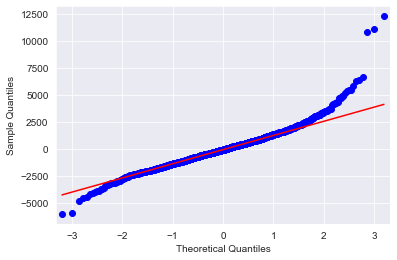

In [43]:
qq_plot = sm.qqplot(model4.resid,line='q')

In [44]:
model5= smf.ols(formula= 'Price ~ Age_08_04+KM+HP+cc+Doors',data= toyota_data).fit()
print('R2 Score           : ',round(model5.rsquared,5))      ## Contribution of input features towards the predication
print('R2 adjusted Score  : ',round(model5.rsquared_adj,5))  ## Contribution of overall input features towards the predication
print('AIC                : ',round(model5.aic,4))
print('BIC                : ',round(model5.bic,4))

R2 Score           :  0.81576
R2 adjusted Score  :  0.81511
AIC                :  25196.5421
BIC                :  25228.1598


In [45]:
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     1266.
Date:                Thu, 29 Sep 2022   Prob (F-statistic):               0.00
Time:                        00:58:39   Log-Likelihood:                -12592.
No. Observations:                1436   AIC:                         2.520e+04
Df Residuals:                    1430   BIC:                         2.523e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.508e+04    406.994     37.055      0.000    1.43e+04    1.59e+04
Age_08_04   -150.7765      2.633    -57.259      0.000    -155.942    -145.611
KM            -0.0131      0.001     -9.627      0.000      -0.016      -0.010
HP            34.4423      2.935     11.736      0.000      28.685      40.199
cc             0.4744      0.099      4.769      0.000       0.279       0.670
Doors        183.2118     43.977      4.166      0.000      96.946     269.477
==============================================================================
Omnibus:                      395.536   Durbin-Watson:                   1.342
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2880.102
Skew:                           1.082   Prob(JB):                         0.00
Kurtosis:                       9.592   Cond. No.                     7.73e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.73e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

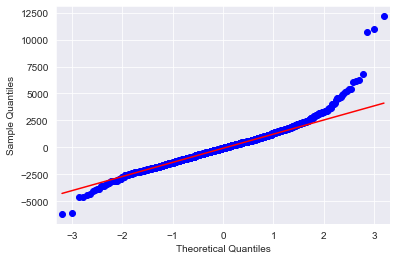

In [46]:
qq_plot = sm.qqplot(model5.resid,line='q')

In [47]:
model6= smf.ols(formula= 'Price ~ Age_08_04+KM+HP+cc+Doors+Gears',data= toyota_data).fit()
print('R2 Score           : ',round(model6.rsquared,5))      ## Contribution of input features towards the predication
print('R2 adjusted Score  : ',round(model6.rsquared_adj,5))  ## Contribution of overall input features towards the predication
print('AIC                : ',round(model6.aic,4))
print('BIC                : ',round(model6.bic,4))

R2 Score           :  0.81735
R2 adjusted Score  :  0.81658
AIC                :  25186.1133
BIC                :  25223.0007


In [48]:
model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     1066.
Date:                Thu, 29 Sep 2022   Prob (F-statistic):               0.00
Time:                        00:59:00   Log-Likelihood:                -12586.
No. Observations:                1436   AIC:                         2.519e+04
Df Residuals:                    1429   BIC:                         2.522e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    1.12e+04   1172.175      9.559      0.000    8905.355    1.35e+04
Age_08_04   -150.3382      2.626    -57.256      0.000    -155.489    -145.188
KM            -0.0136      0.001     -9.975      0.000      -0.016      -0.011
HP            31.8297      3.016     10.555      0.000      25.914      37.745
cc             0.4735      0.099      4.778      0.000       0.279       0.668
Doors        213.0302     44.612      4.775      0.000     125.519     300.542
Gears        802.1152    227.585      3.524      0.000     355.678    1248.552
==============================================================================
Omnibus:                      405.118   Durbin-Watson:                   1.338
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3044.758
Skew:                           1.103   Prob(JB):                         0.00
Kurtosis:                       9.784   Cond. No.                     2.27e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.27e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

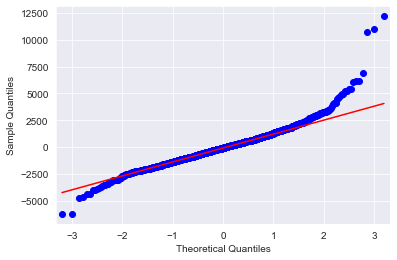

In [49]:
qq_plot = sm.qqplot(model6.resid,line='q')

In [50]:
model7= smf.ols(formula= 'Price ~ Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax',data= toyota_data).fit()
print('R2 Score           : ',round(model7.rsquared,5))      ## Contribution of input features towards the predication
print('R2 adjusted Score  : ',round(model7.rsquared_adj,5))  ## Contribution of overall input features towards the predication
print('AIC                : ',round(model7.aic,4))
print('BIC                : ',round(model7.bic,4))

R2 Score           :  0.83969
R2 adjusted Score  :  0.8389
AIC                :  25000.7486
BIC                :  25042.9055


In [51]:
model7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     1069.
Date:                Thu, 29 Sep 2022   Prob (F-statistic):               0.00
Time:                        00:59:22   Log-Likelihood:                -12492.
No. Observations:                1436   AIC:                         2.500e+04
Df Residuals:                    1428   BIC:                         2.504e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      9980.6587   1101.951      9.057      0.000    7819.042    1.21e+04
Age_08_04      -136.3855      2.652    -51.426      0.000    -141.588    -131.183
KM               -0.0201      0.001    -14.793      0.000      -0.023      -0.017
HP               43.5743      2.946     14.790      0.000      37.795      49.354
cc                0.1066      0.096      1.106      0.269      -0.083       0.296
Doors           157.9483     41.991      3.762      0.000      75.578     240.318
Gears           620.1432    213.676      2.902      0.004     200.990    1039.296
Quarterly_Tax    16.1981      1.148     14.108      0.000      13.946      18.450
==============================================================================
Omnibus:                      211.411   Durbin-Watson:                   1.371
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              765.784
Skew:                           0.690   Prob(JB):                    5.15e-167
Kurtosis:                       6.301   Cond. No.                     2.28e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.28e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

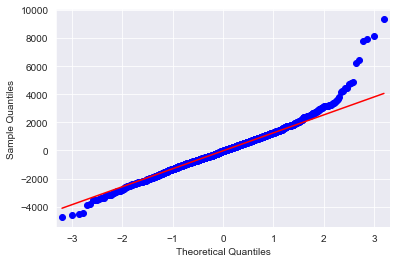

In [53]:
qq_plot = sm.qqplot(model7.resid,line='q')

In [54]:
model8= smf.ols(formula= 'Price ~ Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data= toyota_data).fit()
print('R2 Score           : ',round(model8.rsquared,5))      ## Contribution of input features towards the predication
print('R2 adjusted Score  : ',round(model8.rsquared_adj,5))  ## Contribution of overall input features towards the predication
print('AIC                : ',round(model8.aic,4))
print('BIC                : ',round(model2.bic,4))

R2 Score           :  0.86376
R2 adjusted Score  :  0.863
AIC                :  24769.0766
BIC                :  25394.4185


In [55]:
model8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Thu, 29 Sep 2022   Prob (F-statistic):               0.00
Time:                        01:00:17   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1427   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5573.1064   1411.390     -3.949      0.000   -8341.728   -2804.485
Age_08_04      -121.6584      2.616    -46.512      0.000    -126.789    -116.527
KM               -0.0208      0.001    -16.622      0.000      -0.023      -0.018
HP               31.6809      2.818     11.241      0.000      26.152      37.209
cc               -0.1211      0.090     -1.344      0.179      -0.298       0.056
Doors            -1.6166     40.006     -0.040      0.968     -80.093      76.859
Gears           594.3199    197.055      3.016      0.003     207.771     980.869
Quarterly_Tax     3.9491      1.310      3.015      0.003       1.379       6.519
Weight           16.9586      1.068     15.880      0.000      14.864      19.054
==============================================================================
Omnibus:                      151.719   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.853
Skew:                          -0.219   Prob(JB):                    1.90e-220
Kurtosis:                       7.089   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

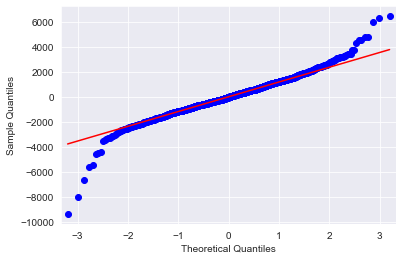

In [56]:
qq_plot = sm.qqplot(model8.resid,line='q')

* We prepared 8 models 
* Now we use SKlearn

In [57]:
X= toyota_data.drop(labels='Price',axis=1)
y= toyota_data[['Price']]

In [58]:
from sklearn.linear_model import LinearRegression
LinearRegression()
Linear_1= LinearRegression()

In [59]:
Linear_1.fit(x,y)

LinearRegression()

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=.20,random_state=12)

In [62]:
X_train.shape, X_test.shape

((1148, 8), (288, 8))

In [63]:
Y_train.shape,Y_test.shape

((1148, 1), (288, 1))

In [64]:
from sklearn.linear_model import LinearRegression
LinearRegression()
Linear_2= LinearRegression()
Linear_2.fit(X_train,Y_train)  ## training data

LinearRegression()

In [65]:
y_pred = Linear_2.predict(X_test)

In [66]:
from sklearn.metrics import r2_score,accuracy_score,classification_report

In [67]:
print('R2_Score : ',round(r2_score(Y_test,y_pred),4))

R2_Score :  0.856


In [68]:
from sklearn.linear_model import ARDRegression

In [69]:
ARD_model = ARDRegression()

In [70]:
ARD_model.fit(X_train,Y_train)

ARDRegression()

In [71]:
y_pred2 = ARD_model.predict(X_test)

In [72]:
print('R2_Score : ',round(r2_score(Y_test,y_pred2),4))

R2_Score :  0.8558


#### The preparing a prediction model for predicting Price is done.